In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
zip_path = tf.keras.utils.get_file(fname='jena_climate_2009_2016.csv.zip',
                                   origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
                                   extract=True)

13574144/13568290 [==============================] - 0s 0us/step


In [0]:
file_path = os.path.dirname(zip_path) + '/jena_climate_2009_2016.csv'

In [0]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [0]:
# 10 min interval

# 6 points == 1hour
# 6 * 24 == 144 points == 1 day 

# Window set == 5days == 144 * 5 == 720 points 

In [0]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [0]:
TRAIN_SPLIT = 300000

tf.random.set_seed(13)

Part 1

In [9]:
uni_data = df['T (degC)']
uni_data.index = df['Date Time']

uni_data.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3ac4bf470>],
      dtype=object)

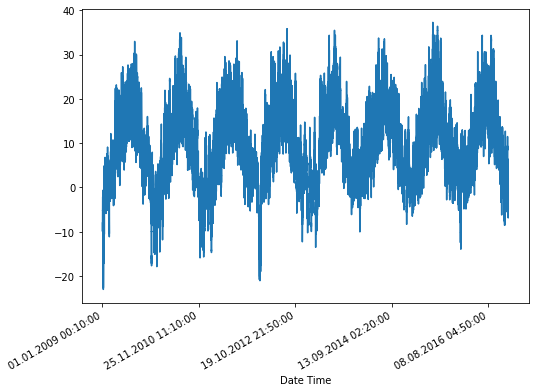

In [10]:
uni_data.plot(subplots=True)

In [0]:
uni_data = uni_data.values

In [0]:
# Scale args

uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [0]:
# Scaling 

uni_data = (uni_data - uni_train_mean) / uni_train_std

In [0]:
univariate_past_history = 20
univariate_future_target = 0

In [34]:
uni_data

array([-1.99766294, -2.04281897, -2.05439744, ..., -1.43494935,
       -1.55883897, -1.62715193])

In [35]:
uni_data.shape

(420551,)

In [0]:
train_uni_data = uni_data[:400000]
val_uni_data = uni_data[400000:]

In [0]:
train_uni_data = np.expand_dims(train_uni_data, -1)
val_uni_data = np.expand_dims(val_uni_data, -1)

In [0]:
time_gen_train = tf.keras.preprocessing.sequence.TimeseriesGenerator(train_uni_data, train_uni_data, 144, batch_size=512)

time_gen_val =  tf.keras.preprocessing.sequence.TimeseriesGenerator(val_uni_data, val_uni_data, 144, batch_size=512)

In [0]:
# def univariate_data(dataset, start_index, end_index, history_size, target_size):
#   data = []
#   labels = []

#   start_index = start_index + history_size

#   print(start_index)
#   if end_index is None:
#     end_index = len(dataset) - target_size
  
#   print(end_index)

#   for i in range(start_index, end_index): # 20 ~ 30000
#     indices = range(i-history_size, i) # i = 20 , history_size = 20, -> 0 ~ 20
#     print(indices)
#     # Reshape data from (history_size,) to (history_size, 1)
#     data.append(np.reshape(dataset[indices], (history_size, 1)))
#     labels.append(dataset[i+target_size])

#     if i == 5000:
#       break
    
#     return np.array(data), np.array(labels)

In [0]:
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT, univariate_past_history, 0)

In [77]:
x_train_uni.shape

(299980, 20, 1)

In [78]:
y_train_uni.shape

(299980,)

In [79]:
x_train_uni[0]

array([[-1.99766294],
       [-2.04281897],
       [-2.05439744],
       [-2.0312405 ],
       [-2.02660912],
       [-2.00113649],
       [-1.95134907],
       [-1.95134907],
       [-1.98492663],
       [-2.04513467],
       [-2.08334362],
       [-2.09723778],
       [-2.09376424],
       [-2.09144854],
       [-2.07176515],
       [-2.07176515],
       [-2.07639653],
       [-2.08913285],
       [-2.09260639],
       [-2.10418486]])

In [82]:
y_train_uni[0]

-2.1041848598100876

In [21]:
x_train_uni[1]

array([[-2.04281897],
       [-2.05439744],
       [-2.0312405 ],
       [-2.02660912],
       [-2.00113649],
       [-1.95134907],
       [-1.95134907],
       [-1.98492663],
       [-2.04513467],
       [-2.08334362],
       [-2.09723778],
       [-2.09376424],
       [-2.09144854],
       [-2.07176515],
       [-2.07176515],
       [-2.07639653],
       [-2.08913285],
       [-2.09260639],
       [-2.10418486],
       [-2.10418486]])

In [0]:
def create_time_step(length):
  return list(range(-length, 0))

In [0]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']

  time_steps = create_time_step(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i :
      plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

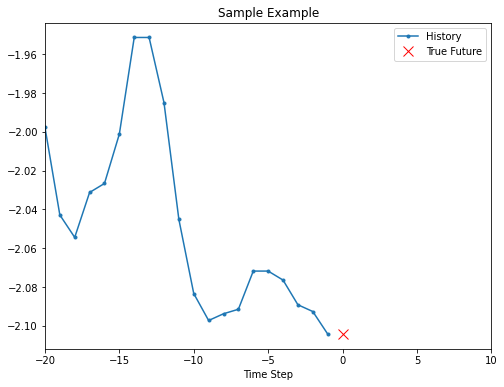

In [24]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [0]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

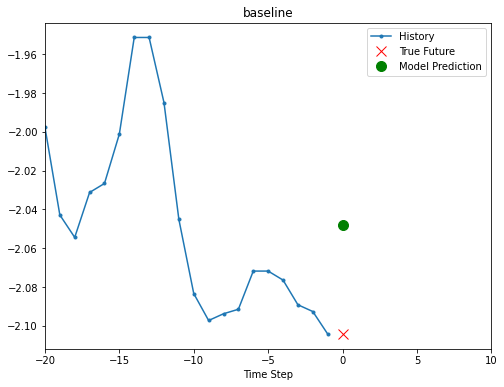

In [26]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0, 'baseline')

Create simple model

In [0]:
class SimpleModel(tf.keras.Model):
  def __init__(self, units):
    super(SimpleModel, self).__init__()
    self.units = units

    self.lstm = tf.keras.layers.LSTM(units)
    self.dense = tf.keras.layers.Dense(10, activation='relu')
    self.out_1 = tf.keras.layers.Dense(1)

  def call(self, inputs):
    x = self.lstm(inputs)
    x = self.dense(x)
    x1 = self.out_1(x)
    return x1

In [0]:
model = SimpleModel(128)

In [0]:
model.compile(loss=['mae', 'mae'], optimizer='adam', metrics=['mse', 'mape'])

In [131]:
hist = model.fit_generator(time_gen_train, epochs=100, validation_data=(time_gen_val))

Epoch 1/100
781/781 [==============================] - 28s 36ms/step - loss: 0.0661 - mse: 0.0148 - mape: 33.0017 - val_loss: 0.0378 - val_mse: 0.0023 - val_mape: 21.6492
Epoch 2/100
781/781 [==============================] - 28s 35ms/step - loss: 0.0386 - mse: 0.0031 - mape: 20.2912 - val_loss: 0.0384 - val_mse: 0.0031 - val_mape: 14.7736
Epoch 3/100
781/781 [==============================] - 28s 35ms/step - loss: 0.0287 - mse: 0.0018 - mape: 15.7873 - val_loss: 0.0209 - val_mse: 9.2932e-04 - val_mape: 11.6800
Epoch 4/100
781/781 [==============================] - 28s 35ms/step - loss: 0.0244 - mse: 0.0012 - mape: 14.2316 - val_loss: 0.0182 - val_mse: 6.8179e-04 - val_mape: 10.5138
Epoch 5/100
781/781 [==============================] - 27s 35ms/step - loss: 0.0221 - mse: 0.0011 - mape: 12.1179 - val_loss: 0.0213 - val_mse: 8.5495e-04 - val_mape: 9.8504
Epoch 6/100
781/781 [==============================] - 27s 35ms/step - loss: 0.0220 - mse: 9.9632e-04 - mape: 11.8586 - val_loss: 0.02

## Data Generator Practice

In [0]:
range_ds = tf.data.Dataset.range(10000)

In [28]:
batches = range_ds.batch(10, drop_remainder=True)


for n, i in enumerate(batches):
  print(i)
  if n == 1:
    break

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int64)
tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int64)


In [29]:
def dense_1_step(batch):
  return batch[:], batch[-1]


predict_dense_1_step = batches.map(dense_1_step)

for n, (features, label) in enumerate(predict_dense_1_step):
  print(features, '-- > ', label.numpy())
  if n == 1:
    break

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int64) -- >  9
tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int64) -- >  19


In [30]:
batches = range_ds.batch(15, drop_remainder=True)

def label_next_5_steps(batch):
  return (batch[:-5], batch[-5:])


predict_dense_5_step = batches.map(label_next_5_steps)

for n, (features, label) in enumerate(predict_dense_5_step):
  print(features, '-- > ', label.numpy())
  if n == 1:
    break

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int64) -- >  [10 11 12 13 14]
tf.Tensor([15 16 17 18 19 20 21 22 23 24], shape=(10,), dtype=int64) -- >  [25 26 27 28 29]


In [31]:
window_size = 5

windows = range_ds.window(window_size, shift=1)

for sub_ds in windows.take(5):
  print(sub_ds.as_numpy_iterator().next())

0
1
2
3
4


In [32]:
 for x in windows.flat_map(lambda x: x).take(30):
   print(x.numpy())

Cause: could not parse the source code:

for x in windows.flat_map(lambda x: x).take(30):

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

for x in windows.flat_map(lambda x: x).take(30):

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0
1
2
3
4
1
2
3
4
5
2
3
4
5
6
3
4
5
6
7
4
5
6
7
8
5
6
7
8
9


In [0]:
features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']

In [134]:
features = df[features_considered]
features.index = df['Date Time']
features.head()

,p (mbar),T (degC),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,996.52,-8.02,1307.75
01.01.2009 00:20:00,996.57,-8.41,1309.80
01.01.2009 00:30:00,996.53,-8.51,1310.24
01.01.2009 00:40:00,996.51,-8.31,1309.19
01.01.2009 00:50:00,996.51,-8.27,1309.00


In [0]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [0]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [137]:
data_mean

array([ 988.65117607,    9.2332563 , 1216.40583777])

In [0]:
dataset = (dataset-data_mean)/data_std

In [0]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)

x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [140]:
x_train_single[0]

array([[ 0.95547359, -1.99766294,  2.2350791 ],
       [ 0.95304508, -1.95134907,  2.18442875],
       [ 0.96883036, -2.09376424,  2.34176293],
       [ 0.99797241, -2.09260639,  2.34812481],
       [ 1.01982895, -2.13776242,  2.40317953],
       [ 1.06597053, -2.18870768,  2.46997927],
       [ 1.11211211, -2.17944491,  2.47218146],
       [ 1.1958955 , -2.07755438,  2.38482796],
       [ 1.28939291, -2.01155711,  2.33858199],
       [ 1.35253402, -1.96176969,  2.3026129 ],
       [ 1.43024615, -1.8830361 ,  2.2389941 ],
       [ 1.47638773, -1.93513921,  2.30750665],
       [ 1.40353261, -1.85293208,  2.20033345],
       [ 1.37439056, -1.74409447,  2.07921305],
       [ 1.35496252, -1.74525232,  2.07407461],
       [ 1.37560481, -1.70935906,  2.04128646],
       [ 1.38410457, -1.68388643,  2.01632831],
       [ 1.3986756 , -1.6977806 ,  2.03565864],
       [ 1.39381859, -1.66651873,  2.00164705],
       [ 1.41446088, -1.63641471,  1.97448672],
       [ 1.41081812, -1.63988825,  1.978

In [141]:
y_train_single[0]

-2.743316352505301

In [0]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [143]:
x_train_multi[0]

array([[ 0.95547359, -1.99766294,  2.2350791 ],
       [ 0.95304508, -1.95134907,  2.18442875],
       [ 0.96883036, -2.09376424,  2.34176293],
       [ 0.99797241, -2.09260639,  2.34812481],
       [ 1.01982895, -2.13776242,  2.40317953],
       [ 1.06597053, -2.18870768,  2.46997927],
       [ 1.11211211, -2.17944491,  2.47218146],
       [ 1.1958955 , -2.07755438,  2.38482796],
       [ 1.28939291, -2.01155711,  2.33858199],
       [ 1.35253402, -1.96176969,  2.3026129 ],
       [ 1.43024615, -1.8830361 ,  2.2389941 ],
       [ 1.47638773, -1.93513921,  2.30750665],
       [ 1.40353261, -1.85293208,  2.20033345],
       [ 1.37439056, -1.74409447,  2.07921305],
       [ 1.35496252, -1.74525232,  2.07407461],
       [ 1.37560481, -1.70935906,  2.04128646],
       [ 1.38410457, -1.68388643,  2.01632831],
       [ 1.3986756 , -1.6977806 ,  2.03565864],
       [ 1.39381859, -1.66651873,  2.00164705],
       [ 1.41446088, -1.63641471,  1.97448672],
       [ 1.41081812, -1.63988825,  1.978

In [144]:
y_train_multi[0]

array([-2.54879807, -2.56616578, -2.58121779, -2.59048056, -2.60205903,
       -2.6136375 , -2.61942673, -2.62405812, -2.6310052 , -2.64258367,
       -2.64605721, -2.64837291, -2.6506886 , -2.66110922, -2.66689846,
       -2.67268769, -2.67500338, -2.67731908, -2.6877397 , -2.69931817,
       -2.71089664, -2.7247908 , -2.72015941, -2.72363296, -2.73521142,
       -2.7444742 , -2.75952621, -2.77457822, -2.79426162, -2.8208921 ,
       -2.82899702, -2.82436564, -2.83478626, -2.84173334, -2.83941765,
       -2.84868042, -2.86257458, -2.89036291, -2.95751803, -3.00151621,
       -3.00383191, -3.02119961, -3.02814669, -3.025831  , -3.02467315,
       -3.03393593, -3.03972516, -3.02814669, -2.9517288 , -2.9320454 ,
       -2.92394047, -2.91930908, -2.91004631, -2.88804722, -2.88573152,
       -2.86720597, -2.81394501, -2.83478626, -2.8556275 , -2.83247056,
       -2.8185764 , -2.81973425, -2.81278717, -2.81047147, -2.82204994,
       -2.81162932, -2.77226253, -2.77689391, -2.77342037, -2.76